<hr style="border-width:5px;border-color:#75DFC1">
 <center> <h1> <span style="color:green"> <b>Project: Communicate Data Findings : </b> </span> </h1> </center>
<hr style="border-width:5px;border-color:#75DFC1">

<center> <h1> <span style="color:red"> <b> Part I - Exploring Prosper's Loan Data : </b> </span> </h1> </center>
<hr style="border-width:5px;border-color:black">

## Introduction
Banks collect a lot of data about their users before issuing them a loan.
In this context, we will study a [dataset](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1659905511742826&usg=AvVaw3ThKJ5Dc5EHpAfo4vO9yGa) containing information about bank loans of 113937 persons with 81 variables
of which :
1. LoanStatus: Current status of the loan
2. BorrowerRate: Borrower's interest rate for this loan 
3. StatedMonthlyIncome: Borrower's declared monthly income
4. Term: The duration of the loan expressed in months 
5. ProsperRating(Alpha): The Prosper rating assigned at the time of listing between AA and HR
6. EmploymentStatus: The employment status of the borrower at the time the list was created
7. LoanOriginalAmount: The initial amount of the loan

8. ProsperScore: A personalised risk score constructed from Prosper's historical data. The score ranges from 1 to 10, with 10 being the best or lowest risk score
9. BorrowerAPR: The borrower's Annual Percentage Rate (APR) for the loan. 
10. ListingCategory: The category of the listing that the borrower has selected when publishing his listing 
11. EmploymentStatusDuration: The duration in months of the employment status at the time the listing is created  
12. IsBorrowerHomeowner A borrower will be classified as a homeowner if they have a mortgage in their credit profile or if they provide documentation confirming that they are a homeowner
13. Occupation: The occupation chosen by the borrower at the time of listing
14. CurrentCreditLines: Number of credit lines outstanding at the time the credit profile was created

etc..........

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading data

In [2]:
data_pret= pd.read_csv("prosperLoanData.csv")
data_pret.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
data_pret.duplicated().sum()

0

In [4]:
data_pret.shape

(113937, 81)

In [5]:
data_pret.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
data_pret.query('BorrowerAPR > 0.43')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
18326,0161336483146123835D6A5,1795,2006-03-11 15:43:45.393000000,HR,36,Defaulted,2007-01-14 00:00:00,0.45857,0.4500,0.4325,...,-6.62,0.00,2829.24,2829.24,0.0,1.0,0,0,0.0,21
22195,5686336572505607862C0C7,1849,2006-03-12 13:44:15.060000000,HR,36,Chargedoff,2009-02-15 00:00:00,0.46201,0.4500,0.4325,...,-16.04,0.00,490.46,490.50,0.0,1.0,0,0,0.0,21
36018,844033650124564886B3EDC,690,2006-02-23 13:57:02.087000000,HR,36,Completed,2006-03-14 00:00:00,0.51229,0.4975,0.4925,...,-0.29,0.00,0.00,0.00,0.0,1.0,0,0,0.0,9
56761,A79D33661366830833F3EF5,2231,2006-03-16 19:30:16.753000000,HR,36,Defaulted,2006-09-19 00:00:00,0.50633,0.4975,0.4800,...,-1.27,0.00,2964.88,2964.88,0.0,1.0,0,0,0.0,21
82043,BBED336465905564254DC8B,1112,2006-03-02 19:00:17.593000000,HR,36,Defaulted,2006-09-05 00:00:00,0.48873,0.4800,0.4750,...,-1.27,0.00,2963.64,2963.64,0.0,1.0,0,0,0.0,20
103973,95ED3365915044756AB754F,1366,2006-03-06 22:36:53.753000000,HR,36,Defaulted,2006-10-08 00:00:00,0.45857,0.4500,0.4325,...,-3.16,-3.75,2764.01,2764.01,0.0,1.0,0,0,0.0,22


### Explication choix des variables pour notre etudes
Comme notre jeux de données comporte 81 on va se focaliser sur 14 d'entre eux que nous jugeons plus pertinent selon notre comprehension et essayer de faire notre etude sur ces variables voir leur relations et en tirer le maximum d'informationS 
Les variables pour notre étude sont : **LoanStatus , BorrowerRate,  StatedMonthlyIncome,  Term,ProsperRating(Alpha),
  EmploymentStatus ,   LoanOriginalAmount,  ProsperScore,   BorrowerAPR,   ListingCategory, EmploymentStatusDuration ,   IsBorrowerHomeowner, CurrentCreditLines,  Occupation.**

## Creation of the dataset 
with the variables listed above

In [7]:
#List with all the variables
list_col=["LoanStatus" , "BorrowerRate", "StatedMonthlyIncome","Term","ProsperRating (Alpha)", "EmploymentStatus" , "LoanOriginalAmount","ProsperScore", "BorrowerAPR", "ListingCategory (numeric)","EmploymentStatusDuration" , "IsBorrowerHomeowner", "CurrentCreditLines","Occupation"]
#New dataframe
data_pret_etudes= data_pret[list_col]

In [8]:
data_pret_etudes.shape

(113937, 14)

In [9]:
data_pret_etudes.head()

,LoanStatus,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanOriginalAmount,ProsperScore,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,Occupation
0,Completed,0.1580,3083.333333,36,NaN,Self-employed,9425,NaN,0.16516,0,2.0,True,5.0,Other
1,Current,0.0920,6125.000000,36,A,Employed,10000,7.0,0.12016,2,44.0,False,14.0,Professional
2,Completed,0.2750,2083.333333,36,NaN,Not available,3001,NaN,0.28269,0,NaN,False,NaN,Other
3,Current,0.0974,2875.000000,36,A,Employed,10000,9.0,0.12528,16,113.0,True,5.0,Skilled Labor
4,Current,0.2085,9583.333333,36,D,Employed,15000,4.0,0.24614,2,44.0,True,19.0,Executive


In [10]:
data_pret_etudes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   BorrowerRate               113937 non-null  float64
 2   StatedMonthlyIncome        113937 non-null  float64
 3   Term                       113937 non-null  int64  
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   EmploymentStatus           111682 non-null  object 
 6   LoanOriginalAmount         113937 non-null  int64  
 7   ProsperScore               84853 non-null   float64
 8   BorrowerAPR                113912 non-null  float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  EmploymentStatusDuration   106312 non-null  float64
 11  IsBorrowerHomeowner        113937 non-null  bool   
 12  CurrentCreditLines         106333 non-null  float64
 13  Occupation                 11

In [11]:
data_pret_etudes.describe().T

,count,mean,std,min,25%,50%,75%,max
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.25000,4.975000e-01
StatedMonthlyIncome,113937.0,5608.025568,7478.497275,0.00000,3200.333333,4666.666667,6825.00000,1.750003e+06
Term,113937.0,40.830248,10.436212,12.00000,36.000000,36.000000,36.00000,6.000000e+01
LoanOriginalAmount,113937.0,8337.013850,6245.800580,1000.00000,4000.000000,6500.000000,12000.00000,3.500000e+04
ProsperScore,84853.0,5.950067,2.376501,1.00000,4.000000,6.000000,8.00000,1.100000e+01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.156290,0.209760,0.28381,5.122900e-01
ListingCategory (numeric),113937.0,2.774209,3.996797,0.00000,1.000000,1.000000,3.00000,2.000000e+01
EmploymentStatusDuration,106312.0,96.071582,94.480605,0.00000,26.000000,67.000000,137.00000,7.550000e+02
CurrentCreditLines,106333.0,10.317192,5.457866,0.00000,7.000000,10.000000,13.00000,5.900000e+01


/tmp/ipykernel_9724/3473964948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_pret_etudes.corr(),annot=True);


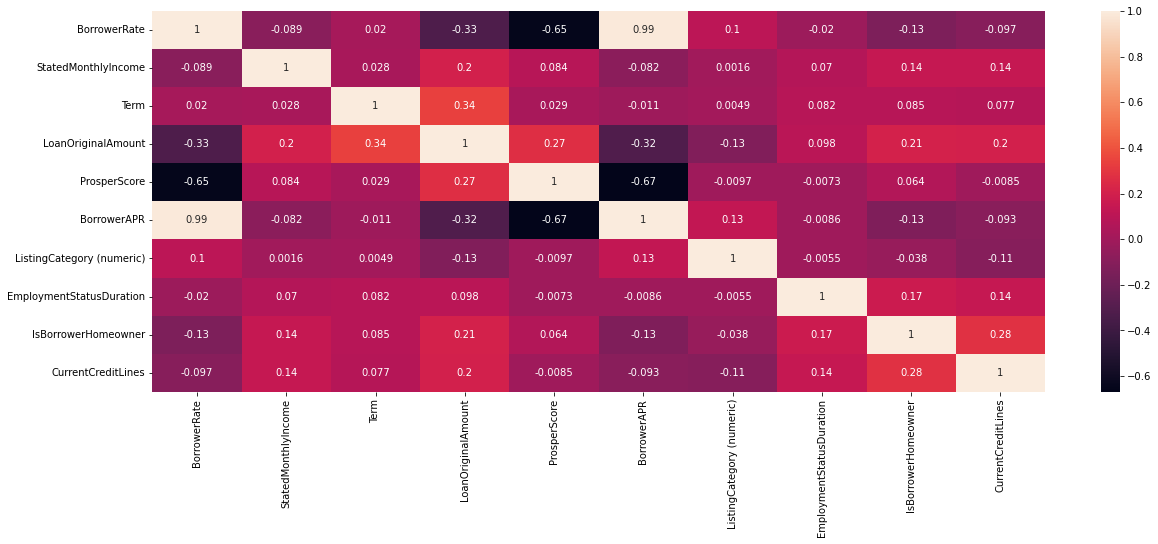

In [12]:
plt.figure(figsize=(20,7))
sns.heatmap(data_pret_etudes.corr(),annot=True);

In [13]:
#Look at the duplicated lines
data_pret_etudes.duplicated().sum()

28

In [14]:
# Missing data
data_pret_etudes.isna().sum().sum()

79265

In [15]:
#the categories of the variable LoanStatus
data_pret_etudes.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [16]:
#ProsperRating variable categories (Alpha)
data_pret_etudes["ProsperRating (Alpha)"].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [17]:
#The categories of the variable EmploymentStatus
data_pret_etudes.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [18]:
#The categories of the variable Occupation
len(data_pret_etudes.Occupation.unique())

68

### What is the structure of your dataset?
Our dataset is composed of 113937 rows and 14 columns after filtering for our study:

1 of type bool (IsBorrowerHomeowner)

9 of integer type (BorrowerRate,StatedMonthlyIncome,Term,LoanOriginalAmount,ProsperScore,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,CurrentCreditLines)


Variables of type object (LoanStatus ,ProsperRating (Alpha),EmploymentStatus,Occupation) 

(Pire)---------->(meilleur)

ProsperRating (Alpha) : HR , E ,D ,C ,B , A ,AA

EmploymentStatus : Not available ,Not employed,Other,Retired ,Part-time ,Full-time ,Self-employed,Employed







Has 28 duplicate lines ,79265 missing records

### What is (are) the main feature(s) of interest in your dataset?
The variables I am most interested in are how the annual percentage rate (APR) for a loan is determined or evaluated and how the bank scores an applicant and the status of the loan.


### What characteristics of the dataset do you think will help you investigate the characteristic(s) of interest?

We will explore **the variables StatedMonthlyIncome , Term , ListingCategory, ProsperRating (Alpha) , EmploymentStatusDuration,Occupation EmploymentStatusDuration EmploymentStatus, CurrentCredit Lines, IsBorrowerHomeowner** to see if there is any dependency or influence on our two variables listed above(APR,ProsperScore,LoanStatus).



## Univariate exploration


I start the exploration by looking at the distribution of the variable of interest: BorrowerAPR

In [19]:
#Look at the missing data for this variable
data_pret_etudes.BorrowerAPR.isna().sum()

25

> For the variable BorrewerAPR(APR) there are 25 missing data

In [20]:
# We delete these lines
data_pret_etudes = data_pret_etudes[~data_pret_etudes.BorrowerAPR.isna()]

In [21]:
# Look at the description of our BorrowerAPR variable
data_pret_etudes.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

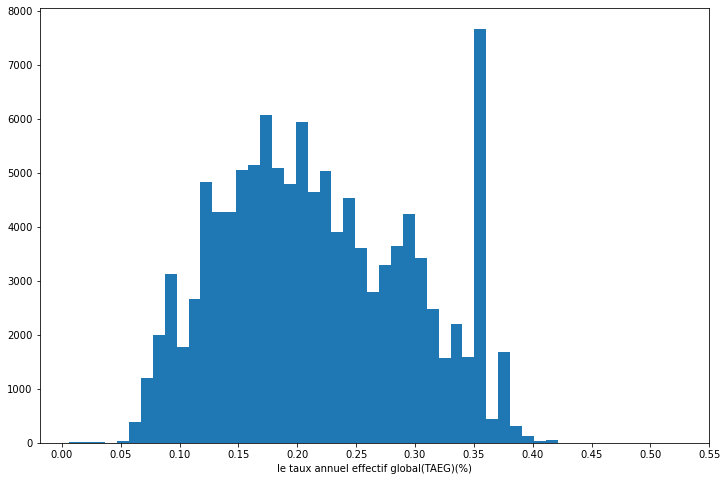

In [22]:
# Tracing the distribution of BorrowerAPR
plt.figure(figsize=(12,8))
plt.hist(data=data_pret_etudes,x='BorrowerAPR',bins=50);
plt.xticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55])
plt.xlabel("le taux annuel effectif global(TAEG)(%)")
plt.show()


By playing with the bins parameter we can see that the distribution of the variable has peaks of values around 0.35% higher and peaks a little lower around the interval 0.15 and 0.25. We can also see that few values have a rate below 0.05 and few others have a rate greater than 0.42 which is well above normal values.

> Try to see the teag > 0.43

In [23]:
data_pret_etudes.query('BorrowerAPR > 0.43')

,LoanStatus,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanOriginalAmount,ProsperScore,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,Occupation
18326,Defaulted,0.4500,10000.000000,36,NaN,NaN,3000,NaN,0.45857,0,NaN,False,NaN,NaN
22195,Chargedoff,0.4500,2916.666667,36,NaN,NaN,1789,NaN,0.46201,0,NaN,False,NaN,NaN
36018,Completed,0.4975,2838.000000,36,NaN,NaN,1500,NaN,0.51229,0,NaN,False,NaN,NaN
56761,Defaulted,0.4975,0.000000,36,NaN,NaN,3000,NaN,0.50633,0,NaN,False,NaN,NaN
82043,Defaulted,0.4800,1583.333333,36,NaN,NaN,3000,NaN,0.48873,0,NaN,False,NaN,NaN
103973,Defaulted,0.4500,3750.000000,36,NaN,NaN,2800,NaN,0.45857,0,NaN,False,NaN,NaN


We notice that for these people most of the information is missing or not specified. And most of them have a Term = 36 Months

## Definition 
A function for drawing bar charts

In [24]:

def diag_bar(col):
    plt.figure(figsize=(20,8))
    color = sns.color_palette()[0]
    #ordre=data_pret_etudes.col.value_counts().index.sort_values()
    sns.countplot(data=data_pret_etudes,x=col,color=color)
    plt.xlabel(col)
    #plt.xticks(rotation=90)
    plt.title("distribution de " + col)

> For the other target variable let's look at its ProsperScore distribution


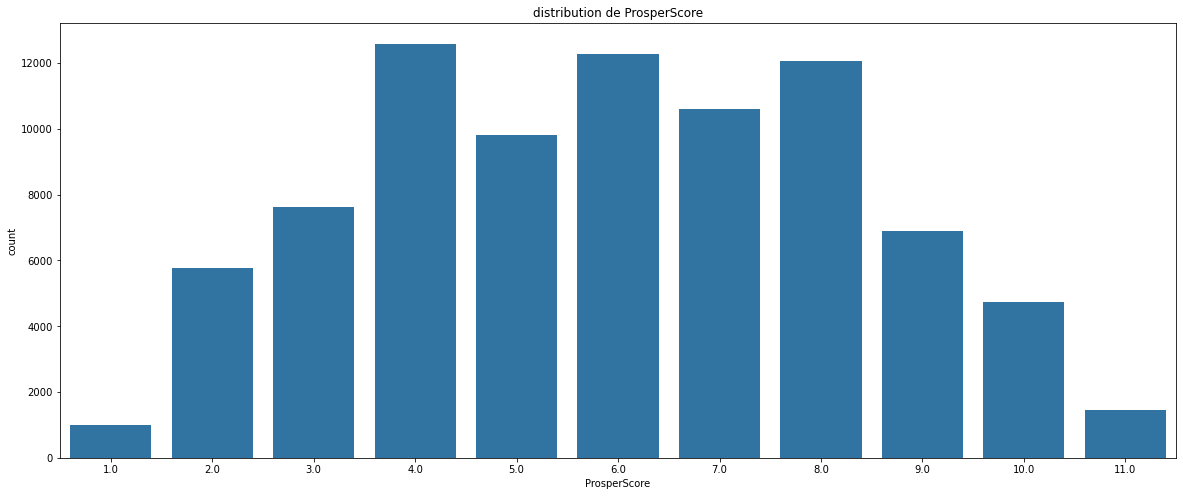

In [25]:

diag_bar('ProsperScore')

We see that in the distribution of the variable the most represented score is 4 followed by 6 and 8.
We note scores of 11 in our dataset whereas the maximum score is 10 so 11 is an incorrect value.

> Let's look at the scores of 11  

In [26]:
data_pret_etudes.query('ProsperScore==11')

,LoanStatus,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanOriginalAmount,ProsperScore,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,Occupation
9,Current,0.0629,3333.333333,36,AA,Employed,10000,11.0,0.07620,7,269.0,True,17.0,Food Service
69,Current,0.1139,2700.000000,60,A,Self-employed,9000,11.0,0.13636,1,12.0,True,5.0,Investor
158,Current,0.0809,6666.666667,36,AA,Employed,5500,11.0,0.09469,6,22.0,False,9.0,Tradesman - Mechanic
224,Current,0.1099,33333.333333,36,A,Employed,30000,11.0,0.13799,1,114.0,True,16.0,Sales - Commission
236,Current,0.0605,4083.333333,36,AA,Employed,9000,11.0,0.06726,1,105.0,True,11.0,Tradesman - Mechanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113762,Current,0.1139,9083.333333,60,A,Employed,25000,11.0,0.13636,20,41.0,True,10.0,Other
113784,Current,0.0990,8583.333333,36,A,Employed,15000,11.0,0.12691,1,158.0,True,10.0,Other
113855,Current,0.1189,6666.666667,36,A,Full-time,8500,11.0,0.14751,3,89.0,False,6.0,Food Service Management
113881,Current,0.1730,8166.666667,60,C,Employed,19432,11.0,0.19681,7,37.0,True,12.0,Professional


> Delete of this data

In [27]:
data_pret_etudes=data_pret_etudes.query('ProsperScore!=11')
data_pret_etudes.shape

(112456, 14)

> Study of the variable LoanStatus 

In [28]:
data_pret_etudes.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

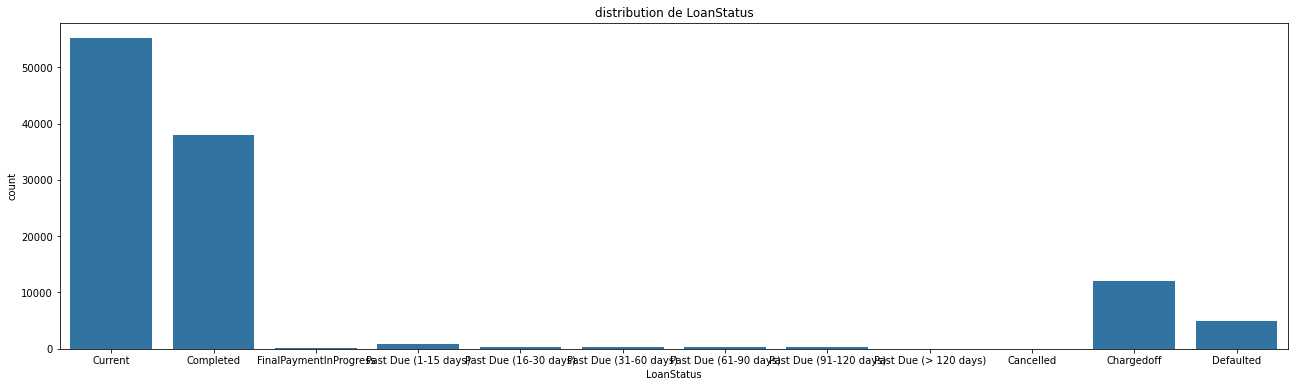

In [29]:
#Plot the bar chart of the variable
plt.figure(figsize=(22,6))
color = sns.color_palette()[0]
sns.countplot(data=data_pret_etudes,x= 'LoanStatus',
              order= ["Current","Completed","FinalPaymentInProgress","Past Due (1-15 days)","Past Due (16-30 days)",
                     "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (> 120 days)",
                     "Cancelled","Chargedoff","Defaulted"],
              color=color);
plt.xlabel('LoanStatus')
#plt.xticks(rotation=90)
plt.title("distribution de LoanStatus");

It can be seen that the Current category is more represented followed by the Completed category.
There is only a small distribution according to the classes Past Due


VARIABLE STUDY ProsperRating (Alpha)


In [30]:
#Convert type to category
list_a = ["HR" , "E" ,"D" ,"C" ,"B" , "A" ,"AA"]
cart_ordr = pd.api.types.CategoricalDtype( list_a,ordered=True )
data_pret_etudes["ProsperRating (Alpha)"].astype(cart_ordr)

0         NaN
1           A
2         NaN
3           A
4           D
         ... 
113932      C
113933      A
113934      D
113935      C
113936      A
Name: ProsperRating (Alpha), Length: 112456, dtype: category
Categories (7, object): ['HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']

In [31]:
data_pret_etudes["ProsperRating (Alpha)"].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [32]:
# #bar chart plot
# diag_bar('ProsperRating (Alpha)')

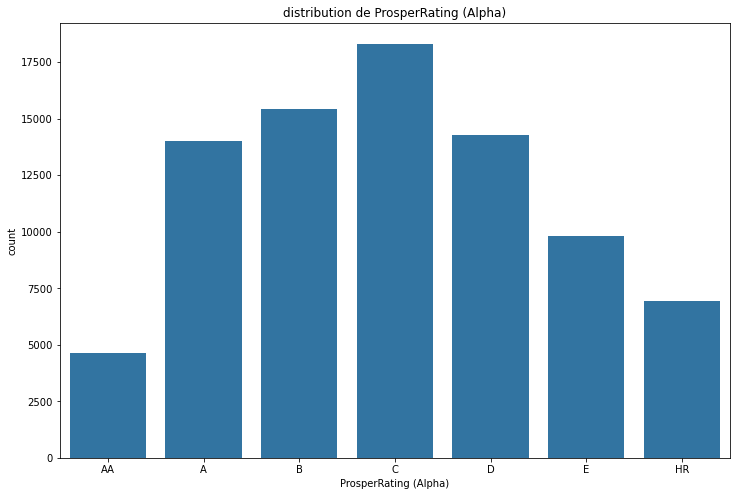

In [33]:
#bar chart plot ProsperRating (Alpha)
plt.figure(figsize=(12,8))
color = sns.color_palette()[0]
sns.countplot(data=data_pret_etudes,x= 'ProsperRating (Alpha)',order= ["AA","A","B","C","D","E","HR"],color=color);
plt.xlabel('ProsperRating (Alpha)')
#plt.xticks(rotation=90)
plt.title("distribution de ProsperRating (Alpha)");

It can be seen that class C is more represented followed by class B.

Study of the distribution of the variable EmploymentStatus

In [34]:
# converting the type of the variable EmploymentStatus to a categorical type
ordre_list = ["Not available", "Not employed","Other","Retired" , "Part-time" ,"Full-time" , "Self-employed","Employed"]
category_list=pd.api.types.CategoricalDtype(ordre_list,ordered=True)
data_pret_etudes.EmploymentStatus.astype(category_list)

0         Self-employed
1              Employed
2         Not available
3              Employed
4              Employed
              ...      
113932         Employed
113933         Employed
113934         Employed
113935        Full-time
113936         Employed
Name: EmploymentStatus, Length: 112456, dtype: category
Categories (8, object): ['Not available' < 'Not employed' < 'Other' < 'Retired' < 'Part-time' < 'Full-time' < 'Self-employed' < 'Employed']

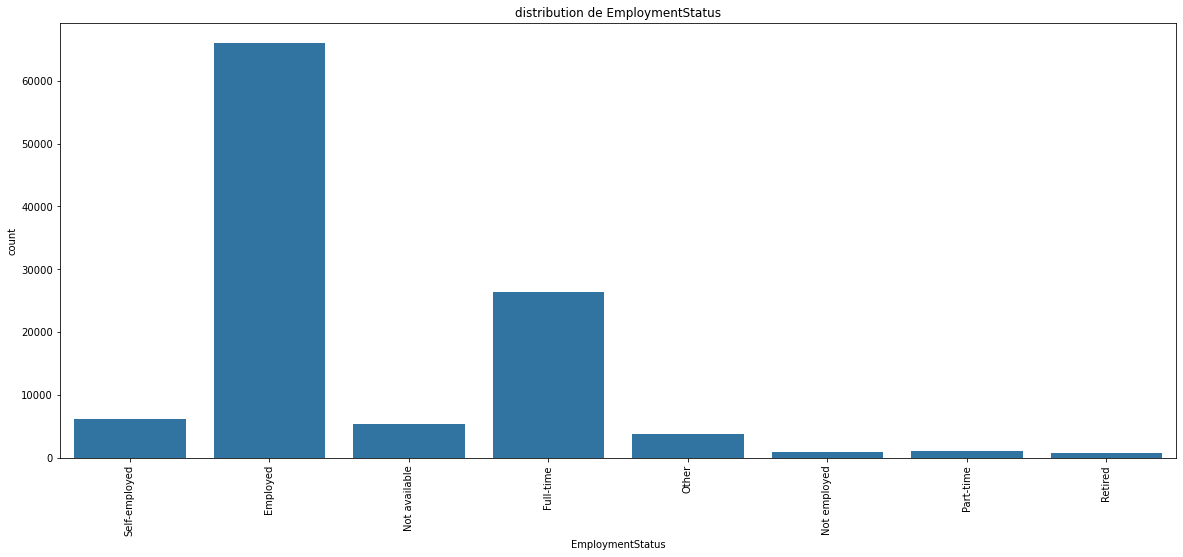

In [35]:
diag_bar('EmploymentStatus')
plt.xticks(rotation=90)
plt.show()

It can be seen that most of the applicants are employees

For the study of the variables StatedMonthlyIncome , Term , EmploymentStatusDuration,LoanOriginalAmount 

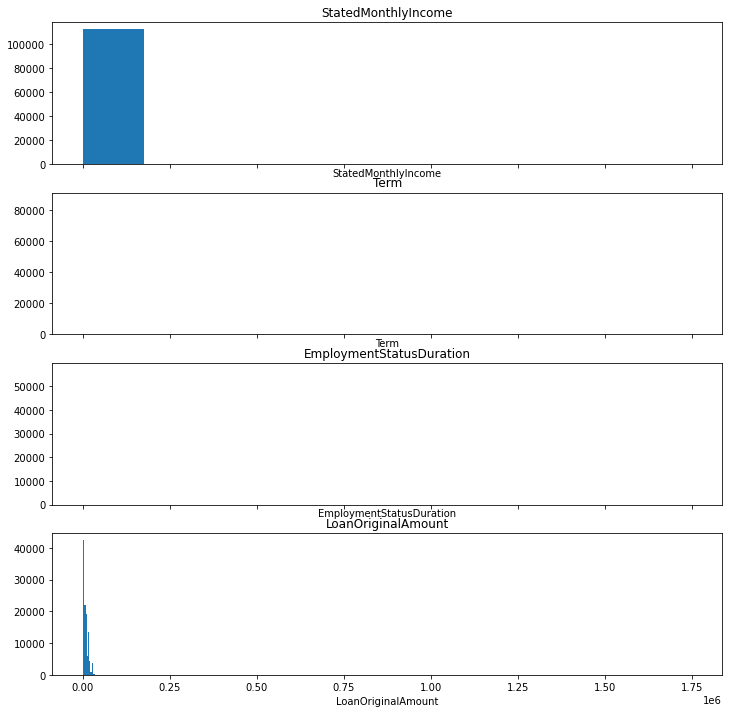

In [36]:
fig,ax=plt.subplots(nrows=4,figsize=[12,12],sharex=True)
colonne = ["StatedMonthlyIncome","Term","EmploymentStatusDuration","LoanOriginalAmount"]
for i in range(len(colonne)):
    col=colonne[i]
    #bins = np.arange(min(data_pret_etudes[col]),max(data_pret_etudes[col]+100,100))
    ax[i].hist(data=data_pret_etudes,x=col)
    ax[i].set_xlabel(col)
    ax[i].set_title(col)

    

We can see that the variables LoanOriginalAmount and EmploymentStatusDuration have almost the same distribution.
We can also see that most of the data are placed on the extreme left which suggests some strong outliers on the right. 
We will study whether these values will be removed or kept afterwards
For the StatedMonthlyIncome column we can see that most of this data is before 30000 and can be removed as outliers.

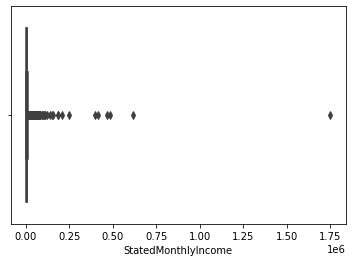

In [37]:
# plotting the boxplot to see outliers
sns.boxplot(data=data_pret_etudes,x='StatedMonthlyIncome');

We can see here that there are too many values which are far beyond the normal value range and surprisingly high.

In [38]:
data_pret_etudes.query('StatedMonthlyIncome >30000').shape[0]

314

We can see that out of all our datasets only 314 have a revenue above 30,000. So we can delete them for the analysis

In [39]:
#Removal of StatedMonthlyIncome values greater than 30000
data_pret_etudes = data_pret_etudes.query('StatedMonthlyIncome <= 30000')

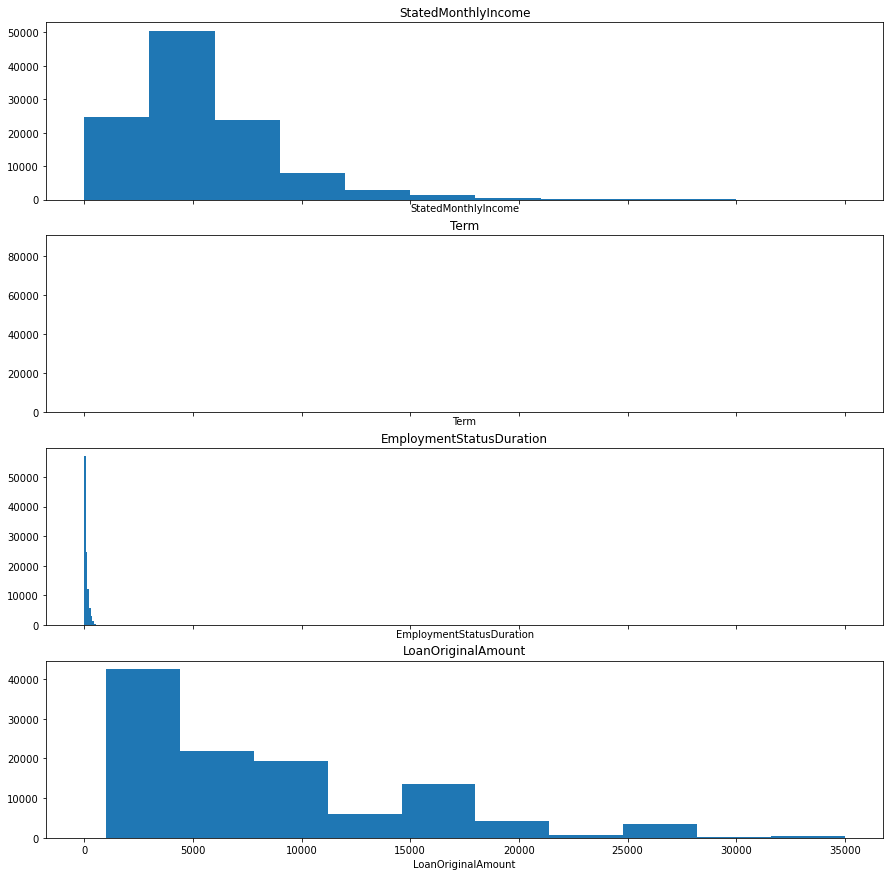

In [40]:
fig,ax=plt.subplots(nrows=4,figsize=[15,15],sharex=True)
colonne = ["StatedMonthlyIncome","Term","EmploymentStatusDuration","LoanOriginalAmount"]
for i in range(len(colonne)):
    col=colonne[i]
    #bins = np.arange(min(data_pret_etudes[col]),max(data_pret_etudes[col]+100,100))
    ax[i].hist(data=data_pret_etudes,x=col)
    ax[i].set_xlabel(col)
    ax[i].set_title(col)

Here the repartition is a bit more coherent for the variable StatedMonthluincome

> For the IsBorrowerHomeowner column

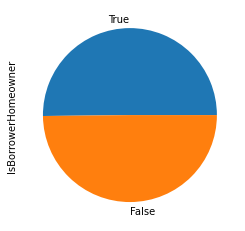

In [41]:
#Repartion of the variable 
data_pret_etudes.IsBorrowerHomeowner.value_counts().plot(kind="pie");

We have about the same number of true and false values in our IsBorrowerHomeowner column

> For the Occupation column, let's look at the distribution

Text(0.5, 1.0, 'diagramme en barre des Occupation')

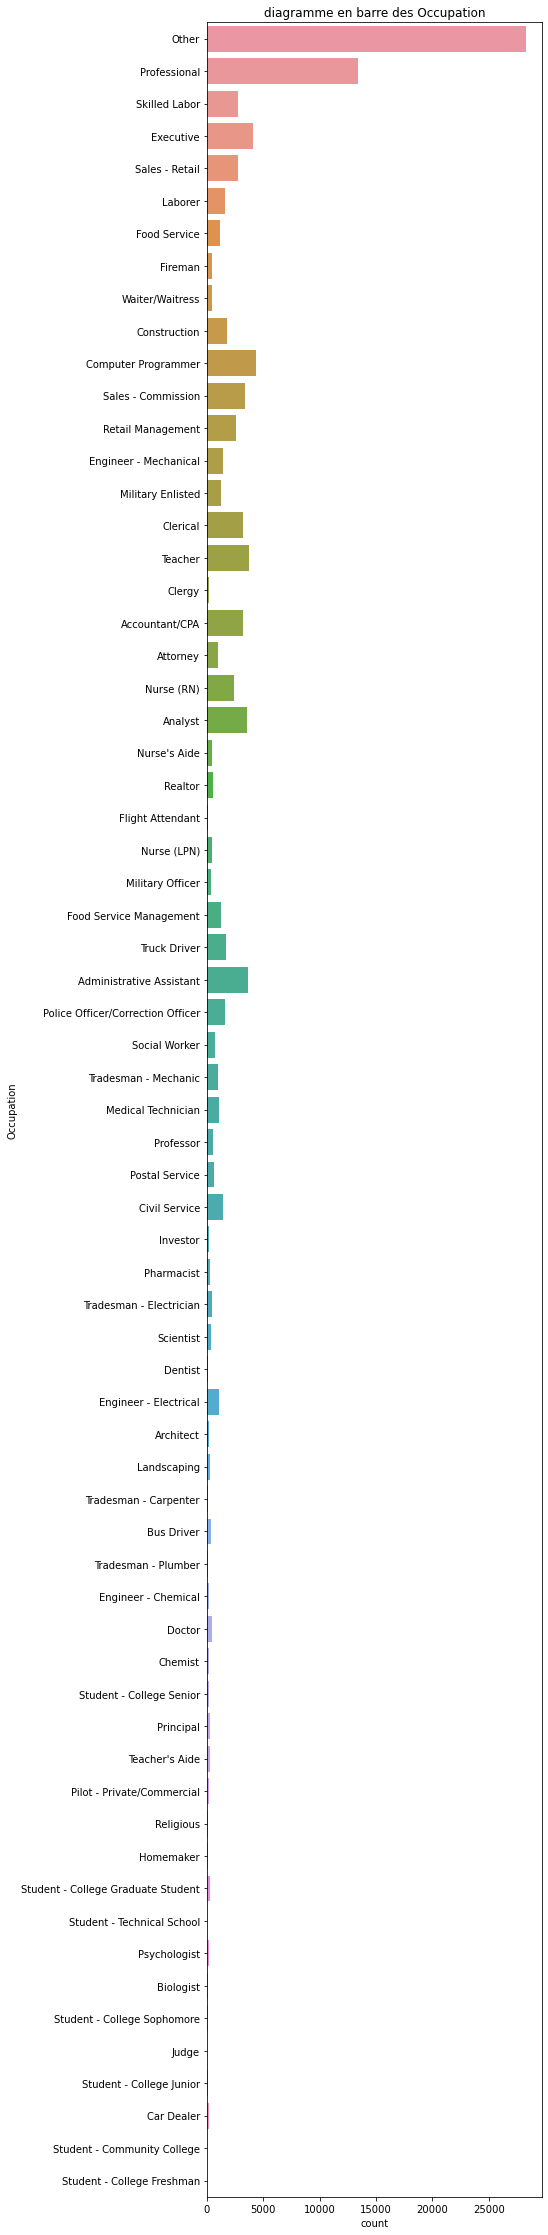

In [42]:
#Tracing the bar chart of the occupation column 
plt.figure(figsize=(6,40))
sns.countplot(data=data_pret_etudes,y='Occupation')
plt.title("diagramme en barre des Occupation")

We notice that Other and Professional are the most represented in our dataset. And many classes have values close to zero.

> Let's look at the distribution of the variable CurrentCreditLines

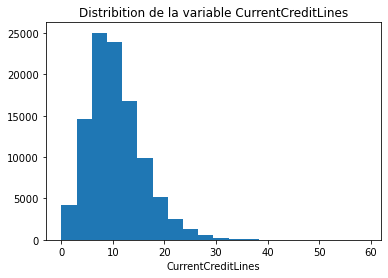

In [43]:
#Tracing the distribution 
plt.hist(x='CurrentCreditLines',data=data_pret_etudes,bins=20)
plt.xlabel('CurrentCreditLines')
plt.title('Distribition de la variable CurrentCreditLines')
plt.show()

The variable CurrentCreditLines is unimodal with an asymmetrical distribution tilted to the right, so there may be too many values or outliers 

In [44]:
len(data_pret_etudes.LoanStatus.unique())


12

### Discuss the distribution of your variable(s) of interest. Were there any unusual points? Did you need to make any transformations?

1. For the variable BorrowerAPR: the borrower's Annual Percentage Rate (APR) for the loan. We can see that it has many peaks with the largest being at 0.35. There are some unusual points with values that exceed the normal range at around 0.42. No transformations have been performed. 

2. For the ProsperScore variable: A custom risk score constructed from historical Prosper data. All classes are well represented and the dominant class is class 4 followed by 6 and 8. We notice that there are scores of 11 in our dataset while the maximum score is 10. The transformations carried out did not remove the scores of 11 in our dataset because it is contraductive to the description of the variable.
3. For the variable LoanStatus : Current status of the loan the most represented status is Current . We don't see any unusual values and we don't have to perform any transformation.



### Were there any unusual distributions among the characteristics you studied? Did you perform any operations on the data to put it in order, adjust it or change its shape? If so, why did you do this?

Looking at the StatedMonthlyIncome variable, it was found that there were some very large values and the distribution was skewed to the right and most of the values are below 30,000. These are therefore considered outliers for our study and we see that it is only 314 people out of the whole data set.
And most of the distributions are not symmetrical and are skewed to the right.
We did not make any type changes in our dataset to classify the categorical variables (EmploymentStatus, ProsperRating (Alpha)). We did not make any changes for these variables.

## Bivariate exploration



To begin, we will examine the pairwise correlation between the quantitative variables

In [45]:
variable_num=["LoanOriginalAmount","BorrowerAPR","StatedMonthlyIncome",'CurrentCreditLines','EmploymentStatusDuration','BorrowerRate']
variable_cat= ["Term",'ProsperRating (Alpha)','IsBorrowerHomeowner','Occupation','LoanStatus','EmploymentStatus','ListingCategory (numeric)','ProsperScore']

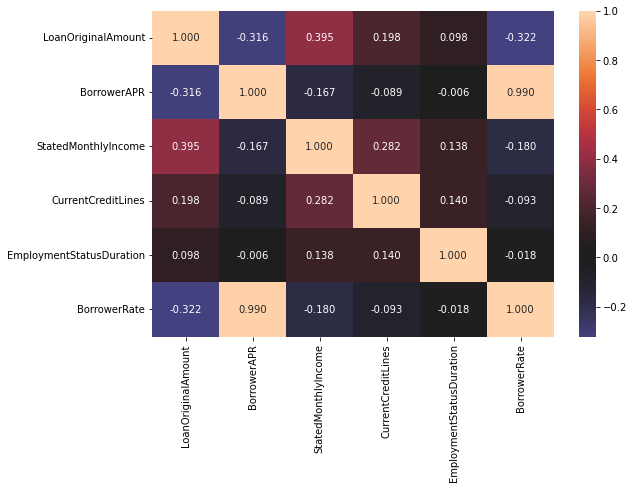

In [46]:
# Plotting the correlation 
plt.figure(figsize=(9,6))
sns.heatmap(data_pret_etudes[variable_num].corr(),annot=True,fmt=".3f",center=0)
plt.show()

We can see that the correlations are quite low overall and we can also see that the correlation between BorrowerAPR and BorrowerRate is close to 1 as well as the correlation between BorrowerAPR and LoanOriginalAmount have a negative correlation with a value of -0.322.


> Let's plot the correlation matrix of our entire dataset

/tmp/ipykernel_9724/1842646254.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_pret_etudes.corr(),annot=True,fmt=".3f",center=0)


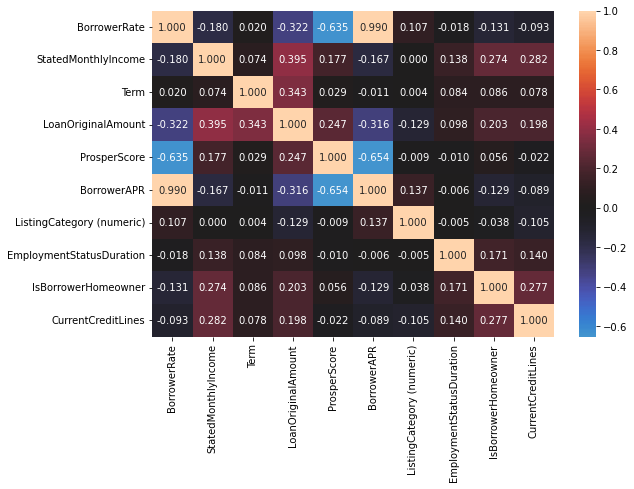

In [47]:
# Plotting the correlation 
plt.figure(figsize=(9,6))
sns.heatmap(data_pret_etudes.corr(),annot=True,fmt=".3f",center=0)
plt.show()

> We notice here that the score is negatively correlated with BorrowerRate with a value of -0.635 , the score has a positive coleration with LoanOriginalAmount with a value of 0.247 . It is also positively correlated with BorrowerAPR which can be understood because BorrowerRate and BorrowerAPR are strongly correlated.

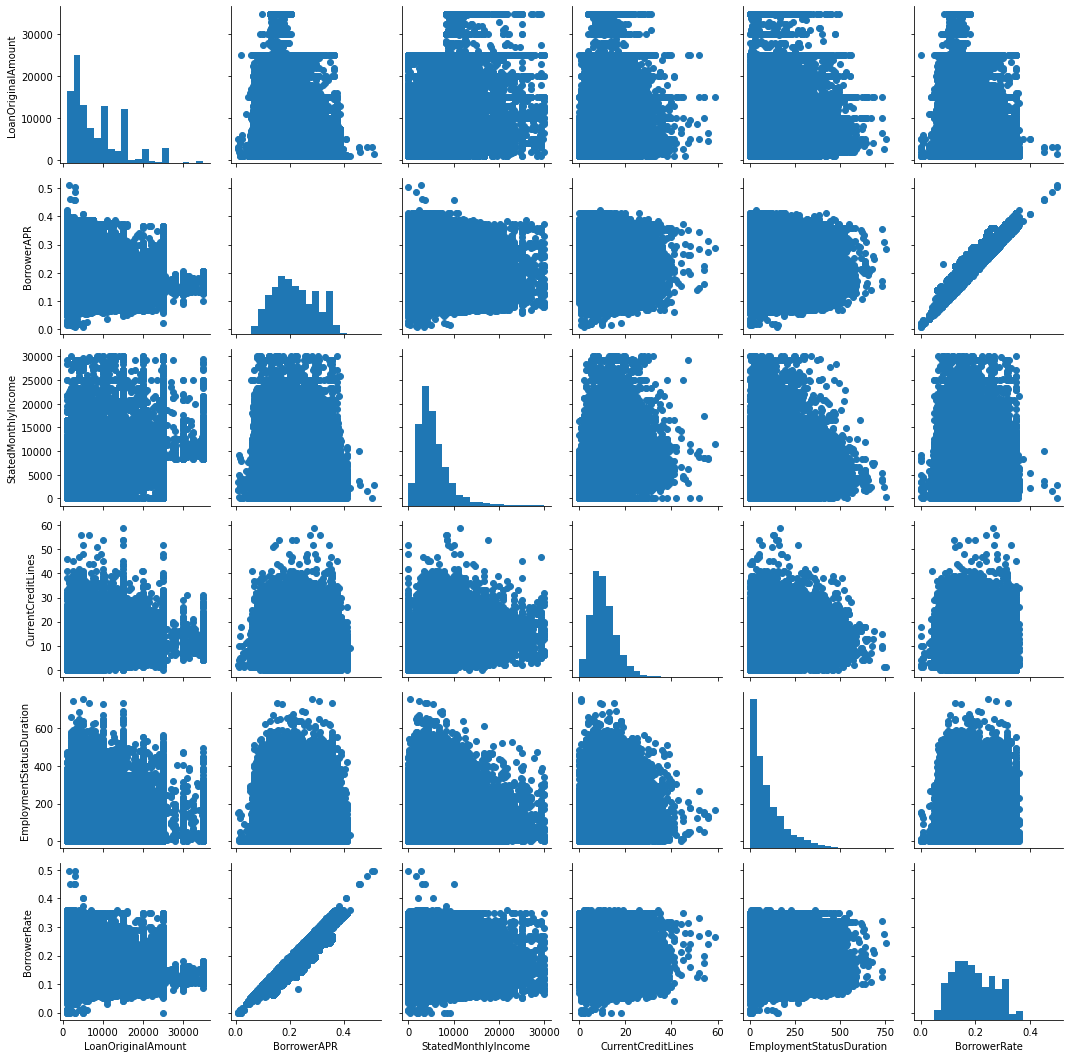

In [48]:
g= sns.PairGrid(data=data_pret_etudes,vars=variable_num)
g = g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter);

The graph is a bit unreadable, let's try to reduce the data

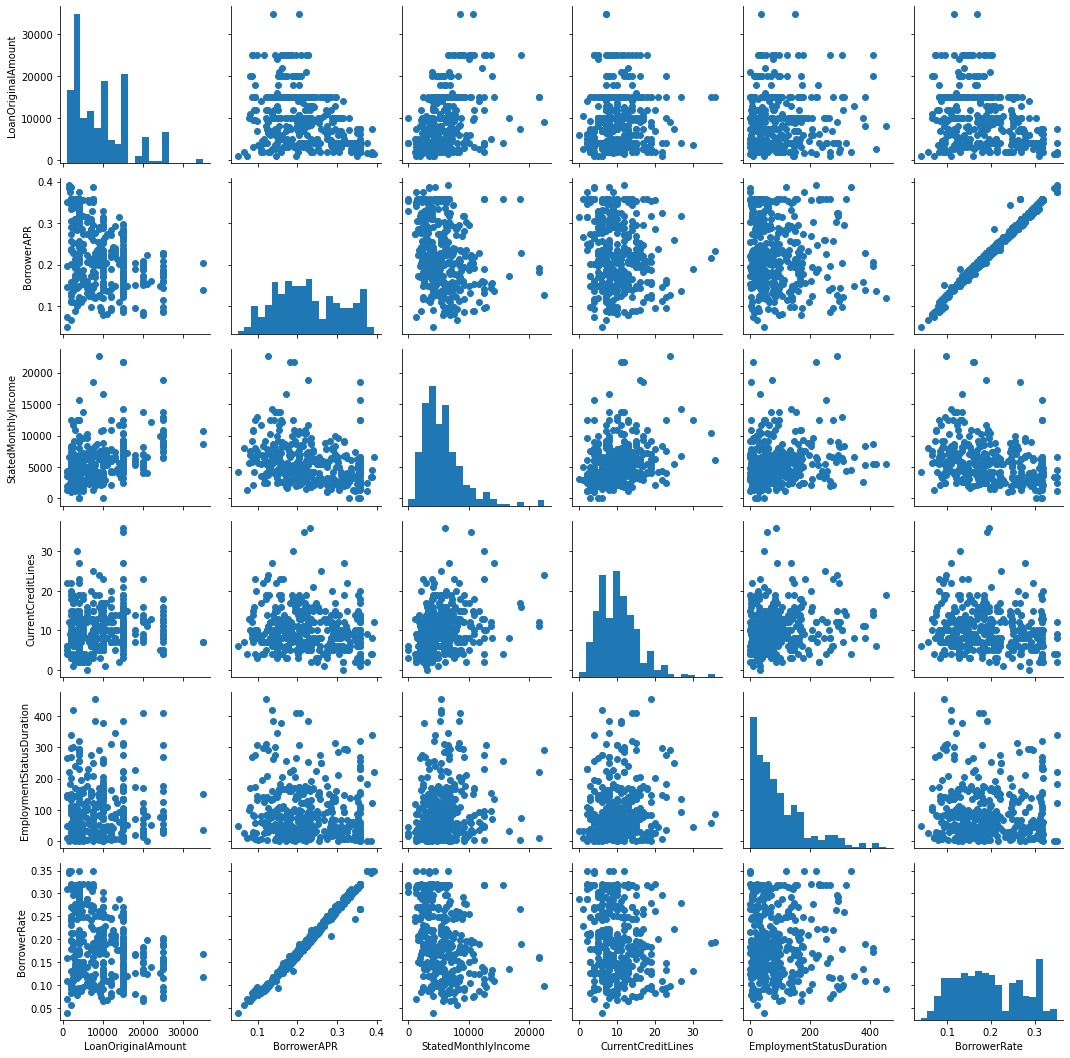

In [49]:
data_pret_etudes_diminuer = data_pret_etudes.sample(n=500,replace=False)
g= sns.PairGrid(data=data_pret_etudes_diminuer.dropna(),vars=variable_num)
g = g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter);

Here we can see the strong correlation between BorrowerRate and BorrowerAPR. The distributions on the diagonal are all slanted to the right

Let's now look at the relationship of borrowerAPR ,CurrentCreditLines , LoanOriginalAmount,EmploymentStatusDuration with the categorical variable

<Figure size 2880x1440 with 0 Axes>

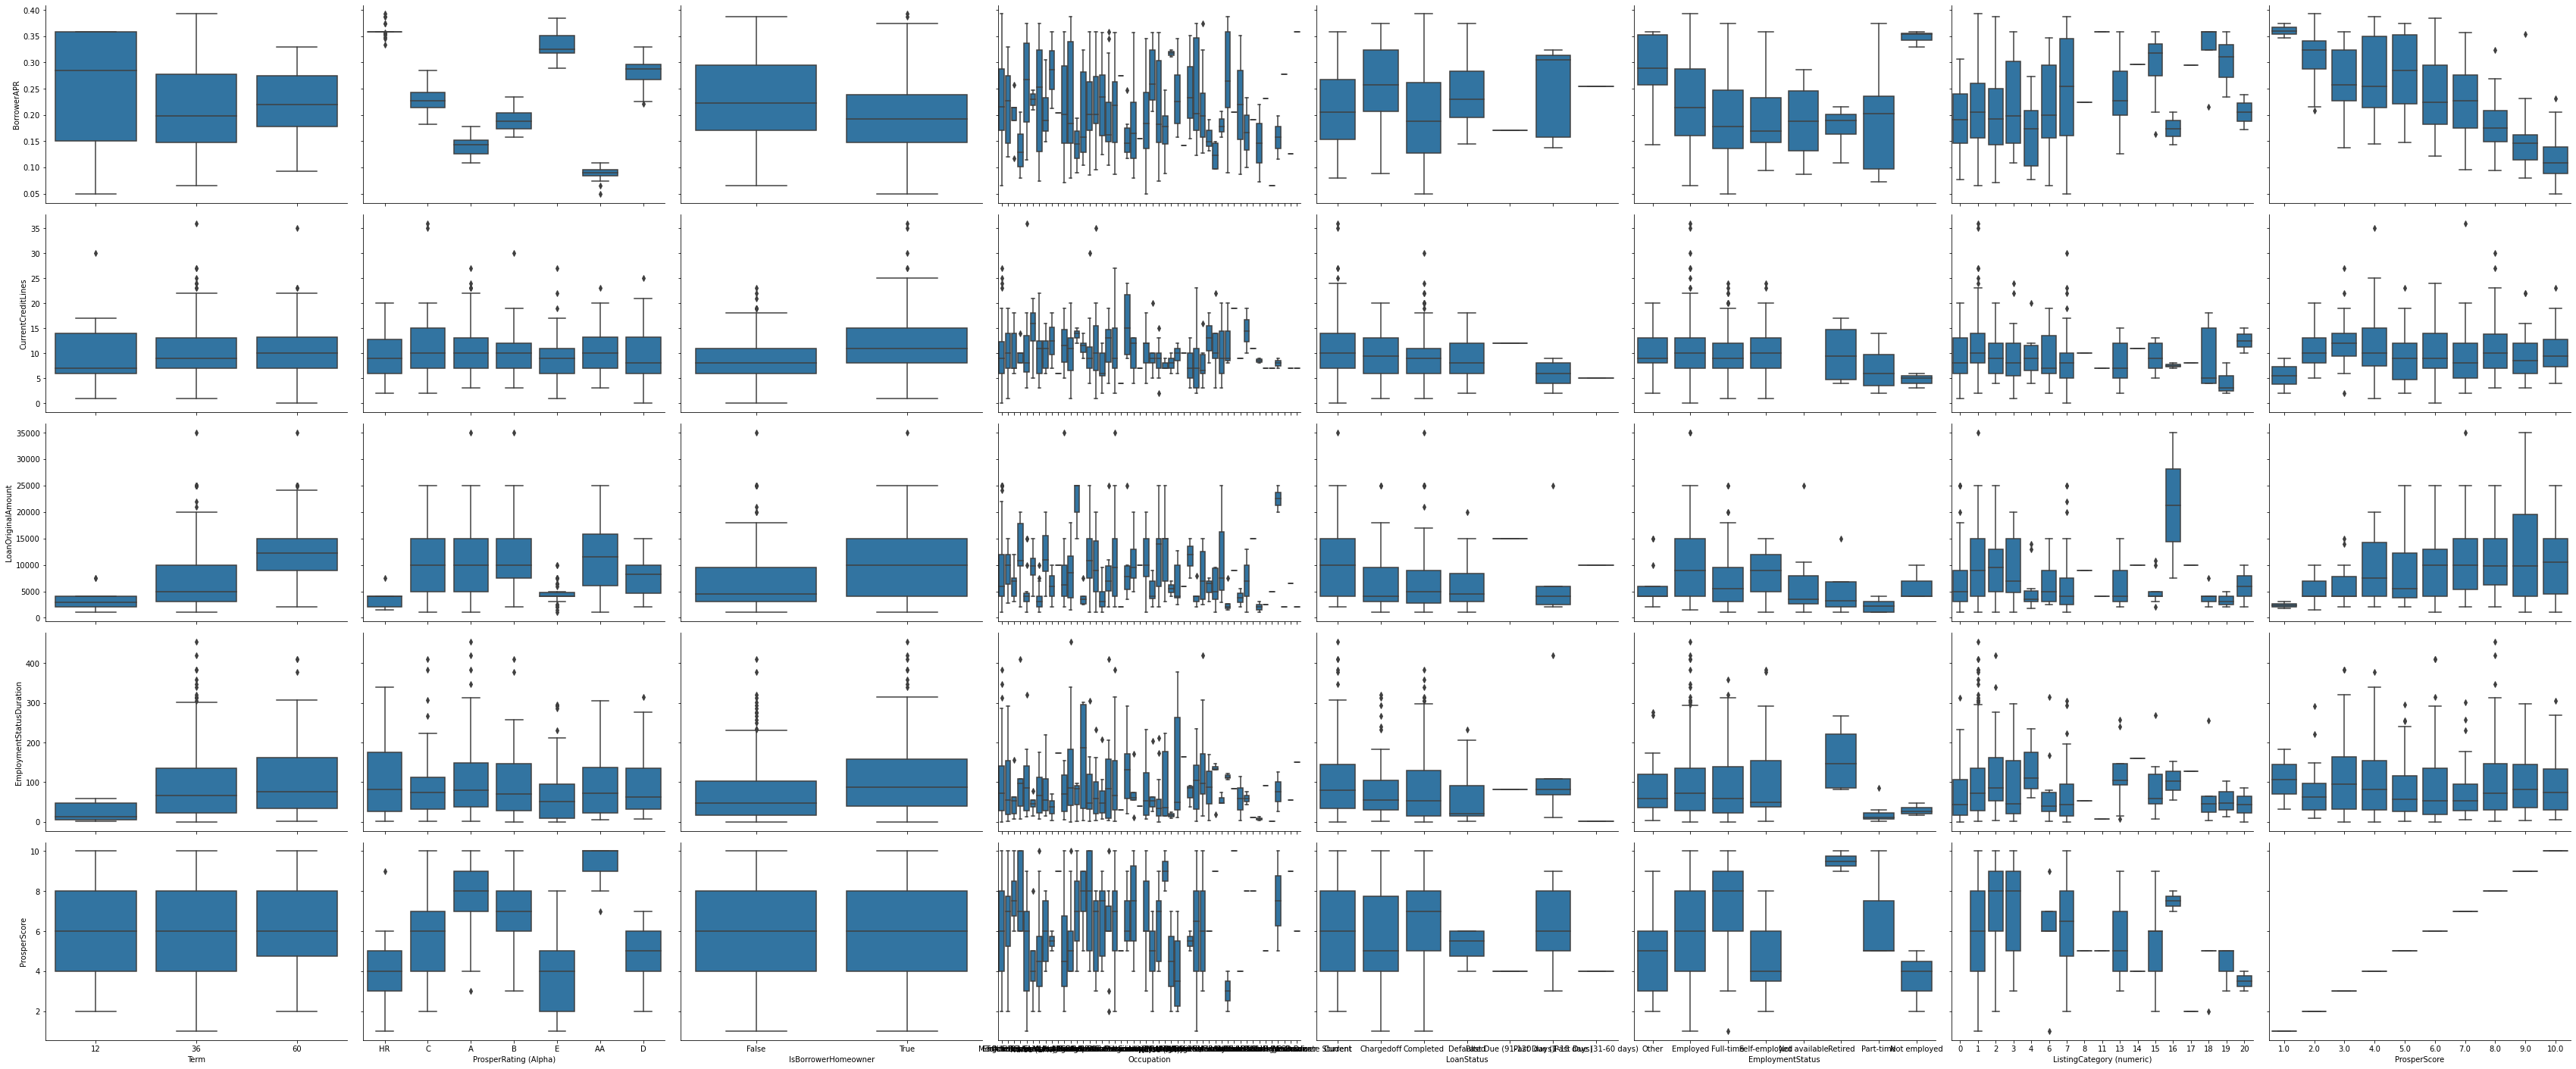

In [50]:
def boxgrid(x,y,**kwargs):
    color = sns.color_palette()[0]
    sns.boxplot(x=x,y=y,color=color)

plt.figure(figsize=(40,20))
g = sns.PairGrid(data = data_pret_etudes_diminuer,y_vars=['BorrowerAPR',"CurrentCreditLines",'LoanOriginalAmount',"EmploymentStatusDuration",'ProsperScore'],x_vars=variable_cat,height=4,aspect=1.5 )
g.map(boxgrid);

The graph is a bit confusing, we can reduce the category variables to try to see more clearly


In [51]:
variable_cat__dim = ['Term','ProsperRating (Alpha)','EmploymentStatus','IsBorrowerHomeowner']

<Figure size 2880x1440 with 0 Axes>

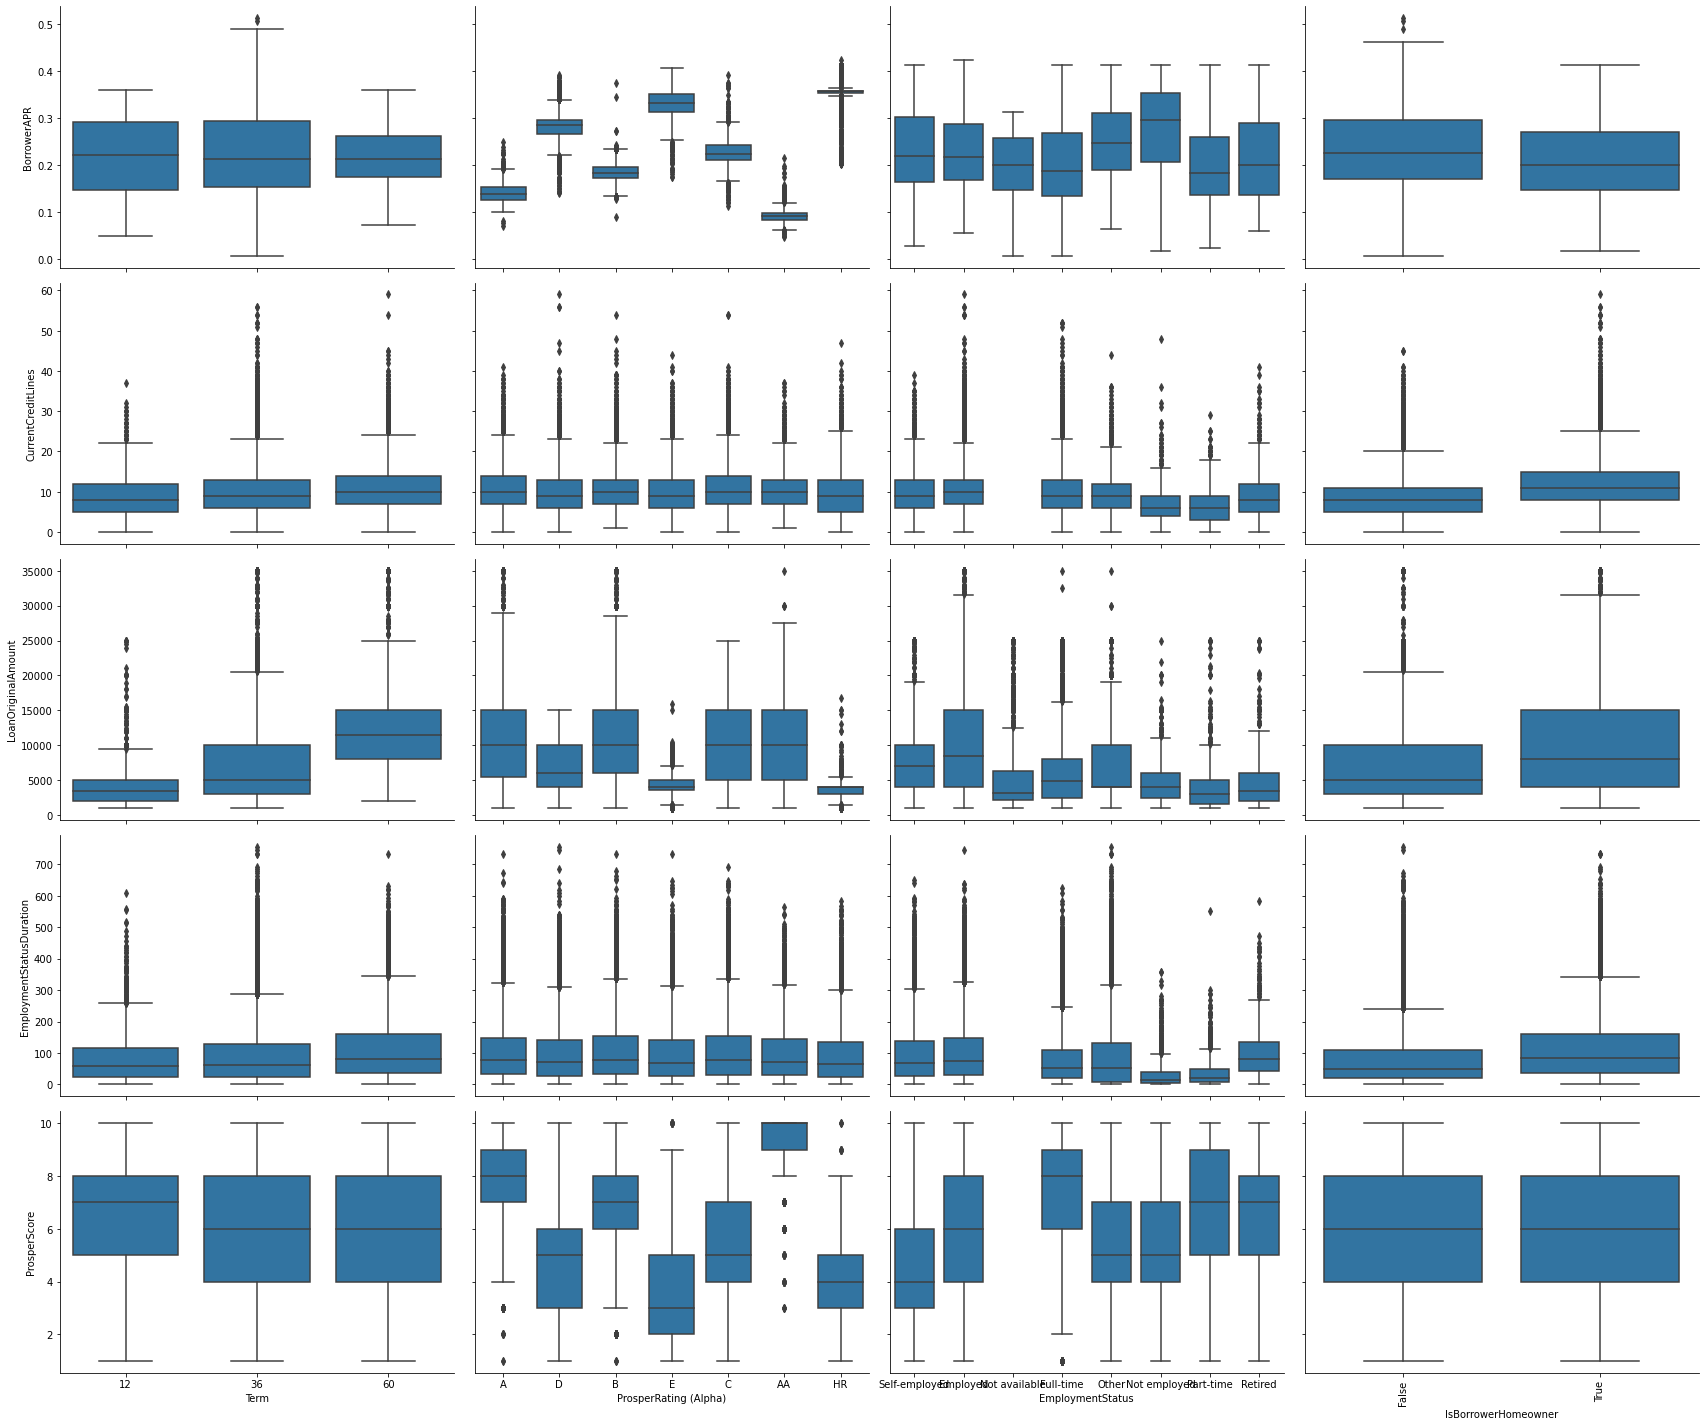

In [52]:
#Retracing from the same graphic
plt.figure(figsize=(40,20))
g = sns.PairGrid(data = data_pret_etudes,y_vars=['BorrowerAPR',"CurrentCreditLines",'LoanOriginalAmount',"EmploymentStatusDuration",'ProsperScore'],x_vars=variable_cat__dim,height=4,aspect=1.5 )
g.map(boxgrid)
plt.xticks(rotation=90);

It can be seen that the longer the term the higher the amount.
For the personalised score we see that people with a ProsperRating (Alpha) of AA have a score of 10 and have the lowest APR and people with low scores have a ProsperRating (Alpha) of E .
It can be seen that other and not employed people have higher APRs.
With people who have a guarantee have lower rates in general.


> Let's look at the relationship between the categorical variables

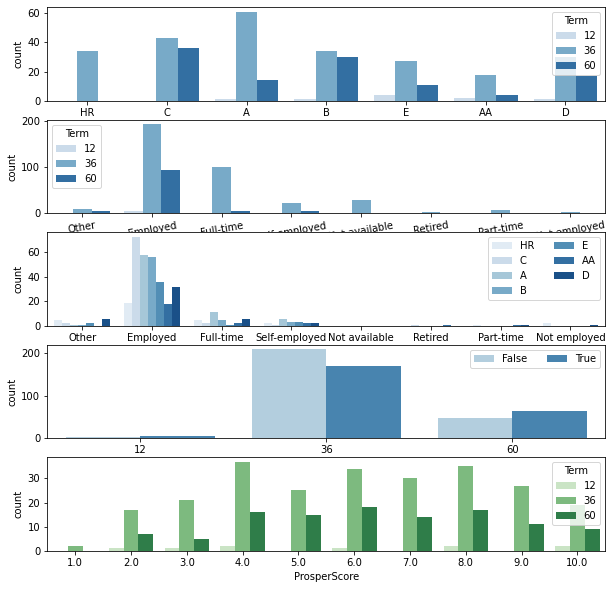

In [53]:
plt.figure(figsize=(10,10))

#Comparaison entre ProsperRating (Alpha) et Term
plt.subplot(5,1,1)
sns.countplot(data=data_pret_etudes_diminuer,x='ProsperRating (Alpha)',hue= 'Term',palette='Blues')
#Comparaison entre Term et EmploymentStatus
plt.subplot(5,1,2)
sns.countplot(data=data_pret_etudes_diminuer,x='EmploymentStatus',hue='Term',palette='Blues')
plt.xticks(rotation=10)
# Comparaison entre EmploymentStatus et Term 
plt.subplot(5,1,3)
sns.countplot(data=data_pret_etudes_diminuer,x='EmploymentStatus',hue='ProsperRating (Alpha)',palette='Blues')
plt.legend(loc=1,ncol=2)
plt.subplot(5,1,4)
sns.countplot(data=data_pret_etudes_diminuer,x='Term',hue='IsBorrowerHomeowner',palette='Blues')
# definition des axes et reorganisation des legend
plt.legend(loc=1,ncol=2)
plt.subplot(5,1,5)
sns.countplot(data=data_pret_etudes_diminuer,x='ProsperScore',hue='Term',palette='Greens');

We see that ProsperRating (Alpha) the duration of most of the categories is 36 months
And people with a status of employed borrower with a duration of 36 months most of the time for the ProsperRating (Alpha)  

Let's look at the distribution between the initial amount of the pres and the TEAG

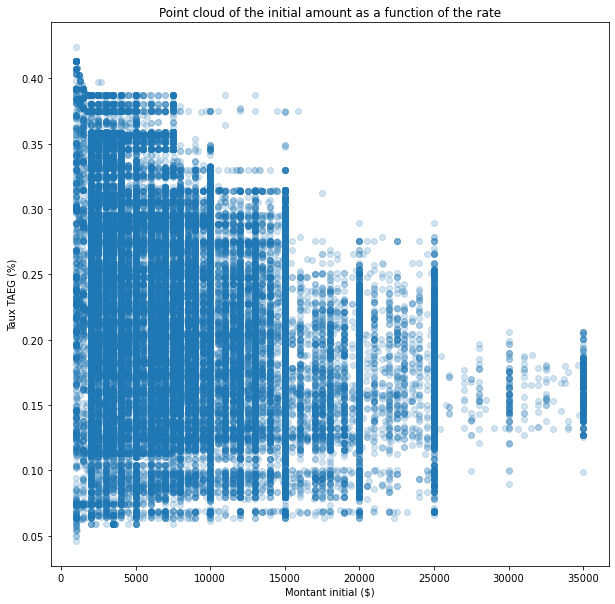

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(data=data_pret_etudes.dropna(),y='BorrowerAPR',x='LoanOriginalAmount',alpha=0.2)
plt.xlabel('Montant initial ($)')
plt.ylabel('Taux TAEG (%)')
plt.title("Point cloud of the initial amount as a function of the rate")
plt.show()

It can be seen that the smaller the amount the higher the rate. So if the amount increases the rate decreases

Let's look at the distribution of the ProsperScore and CurrentLineCredits variables

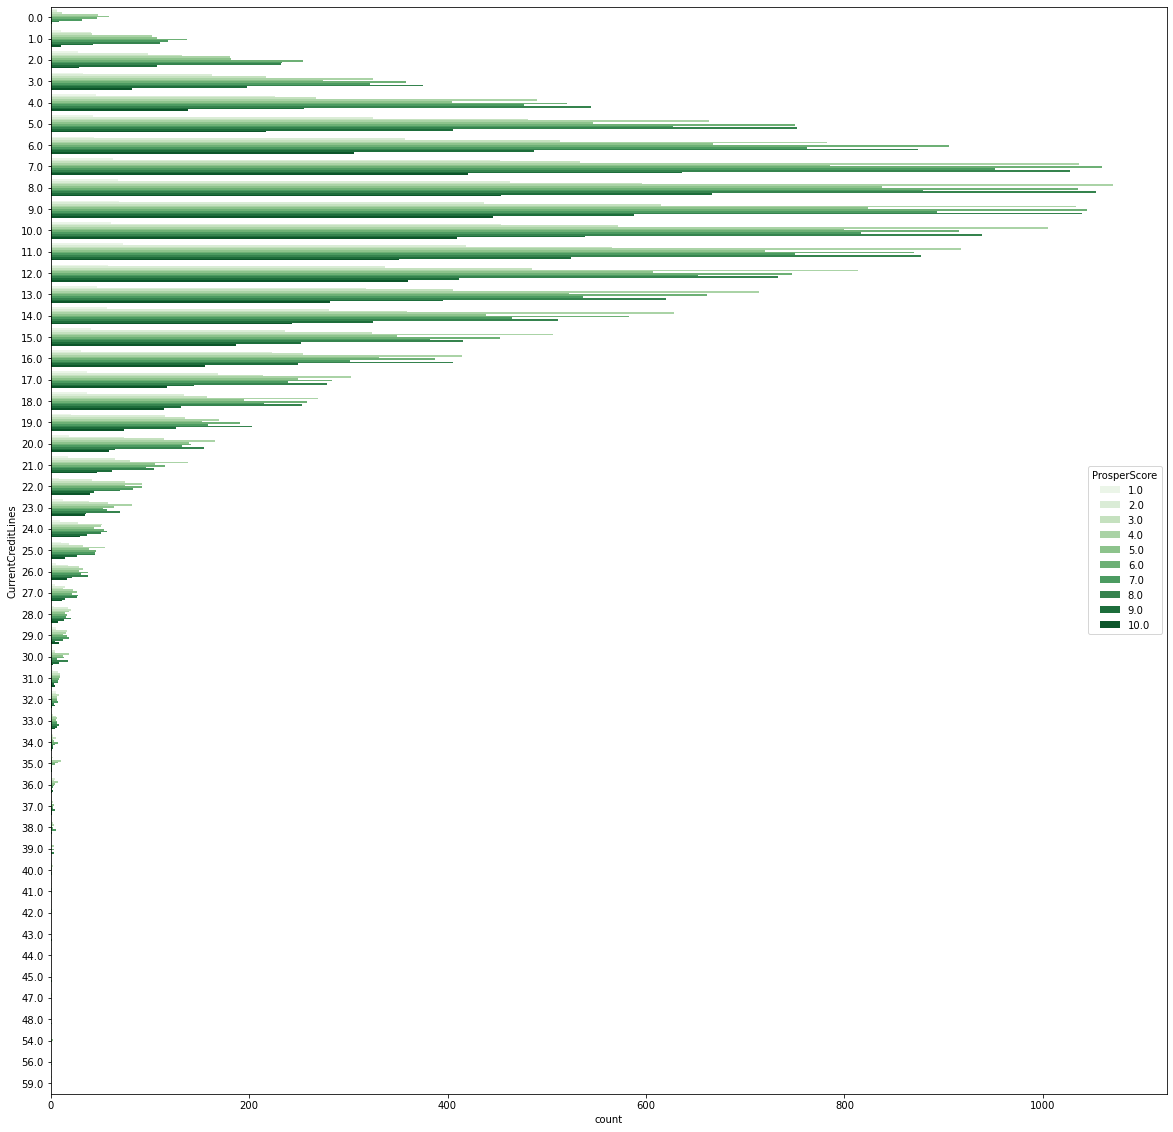

In [55]:
# distribution 
plt.figure(figsize=(20,20))
sns.countplot(data=data_pret_etudes.dropna(),hue='ProsperScore',y='CurrentCreditLines',palette='Greens');

Here we can see that people with credit lines of 9 have less good scores.
And many people with low credit lines

### Talk about some of the relationships you observed in this part of the survey. How did the characteristic(s) of interest to you vary from the other characteristics in the data set?

For the score we notice that the lower the score the more important the BorrowerRate is because their correlation is negative and the ProsperRating (Alpha) also influences the score.
For the APR we see a negative correlation also with the initial amount of the loan, the smaller the amount the higher the interest rate, the higher the interest rate is, depending on the ProsperRating (Alpha).
We also see that other and not employed people have higher APRs.

### Did you observe any interesting relationships between the other characteristics (not the main characteristic(s))?

We can see that the longer the duration of the loan, the higher the initial loan amount.
And the ProsperRating (Alpha) the most represented duration in the classes is 36 months.

## Multivariate exploration



We will try to see the relationship between the duration of the pres the initial amount and the rate of the pres 

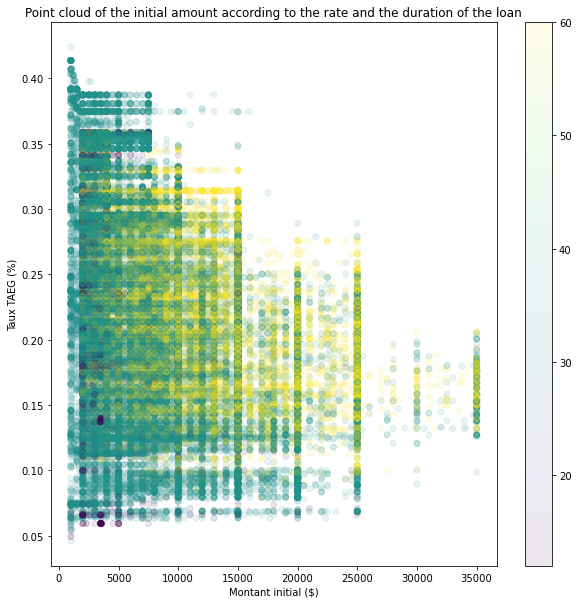

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(data=data_pret_etudes.dropna(),y='BorrowerAPR',x='LoanOriginalAmount',alpha=0.1,c='Term')
plt.colorbar()
plt.xlabel('Montant initial ($)')
plt.ylabel('Taux TAEG (%)')
plt.title("Point cloud of the initial amount according to the rate and the duration of the loan")
plt.show()

Here we see that the pres that correspond to the highest amount and almost the lowest rates.
As the graph is a bit unreadable let's try with a FacetGrid

/home/moustaphe/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/moustaphe/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/moustaphe/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


<Figure size 720x720 with 0 Axes>

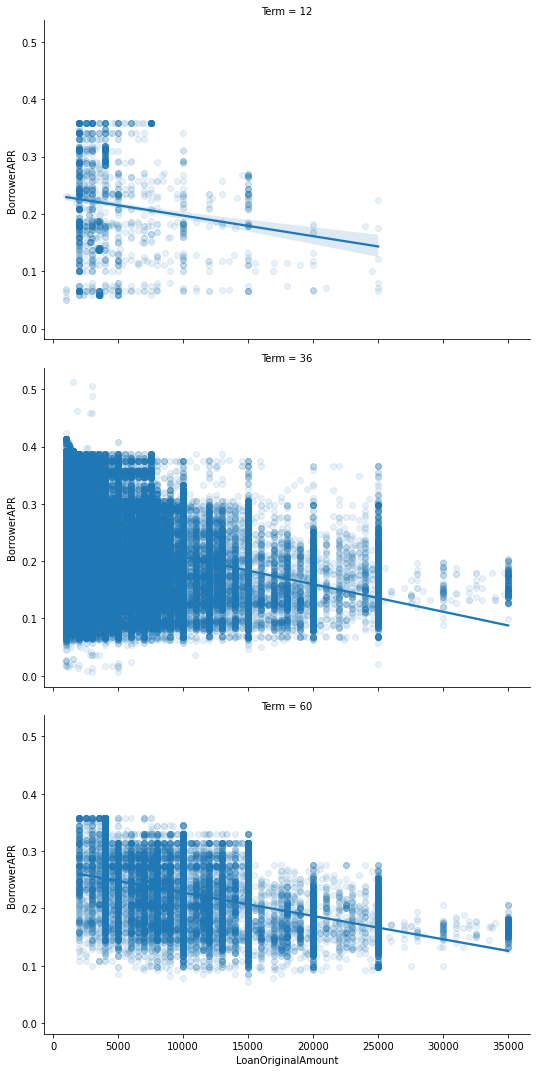

In [57]:
plt.figure(figsize=(10,10))
g= sns.FacetGrid(data=data_pret_etudes,col='Term',col_wrap=1 ,aspect=1.5,height=5)
g.map(sns.regplot,'LoanOriginalAmount','BorrowerAPR',x_jitter=0.04,scatter_kws={'alpha':0.1});
g.add_legend();

As you can see, as the amount increases, the rate decreases.
And the most important debts have a duration of 60 months

Let's look at the relationship between the Alpha score and the rate

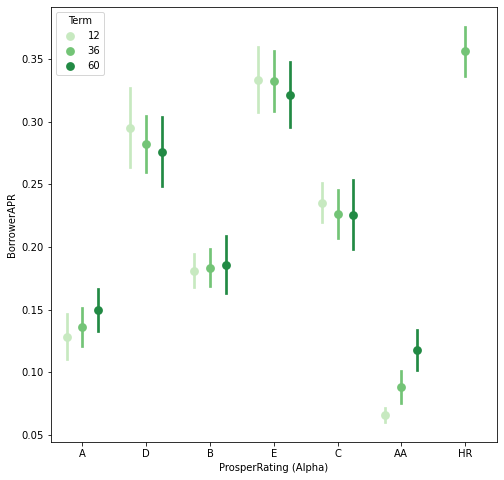

In [58]:
plt.figure(figsize=(8,8))
sns.pointplot(data=data_pret_etudes,x='ProsperRating (Alpha)',y='BorrowerAPR',hue='Term',palette='Greens',linestyles='',dodge=0.5,ci='sd');

We can see that for people with a AA rating the rate is lower and in this same category we can see that as the duration increases the rate increases which is not the case for people with a D rating.
People with a HR score have the highest rates to pay if they borrow for 36 months.

We will see the Score personalised according to the status of the applicant and the time to see or confirm whether the relationship mentioned above exists

/home/moustaphe/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/moustaphe/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/moustaphe/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


<Figure size 720x720 with 0 Axes>

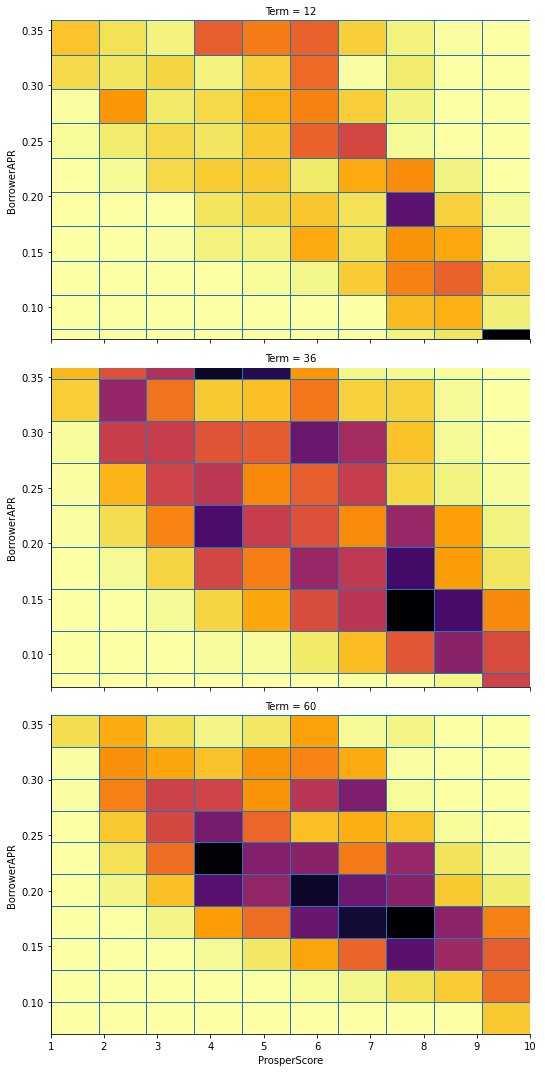

In [59]:
plt.figure(figsize=(10,10))
g= sns.FacetGrid(data=data_pret_etudes.dropna(),col='Term',col_wrap=1 ,aspect=1.5,height=5);
g.map(plt.hist2d,'ProsperScore','BorrowerAPR',cmap = 'inferno_r');
g.add_legend();

In this faceted heat map we can see the relationship between the rate, the custom score and the time 

### Talk about some of the relationships you observed in this part of the survey. Were there any mutually reinforcing characteristics in terms of looking at your interest characteristic(s)?

The rate of a loan has only been seen to depend on the time and the amount also with this study we can see that the rate varies not only with time but also with the ProsperRatin (Alpha). And the status of the applicant as well.

For the personalised score we can see that the time and the rate applied have a very strong dependency 



### Were there any interesting or surprising interactions between the characteristics?

Looking at the point graph there does not seem to be an interaction effect between alpha score, time and rate.
The lowest rates correspond to people with an alpha score of AA and a loan duration of 36 months.  
The heat map indicates that the variables even if not too dependent also.
 

## Conclusions
 We explored our dataset and performed transformations to visualize the distribution of the graphs in a univariate way. We found that the rate is presented as a variable with several peaks. And the personalized score which is the score that the bank gives to its borrowers presented some inconsistent values. 
 We then did a bivariate study to see the negative correlation between the
 and rate and the amount borrowed, also the score had a correlation with the initial amount of the loan.
 And finally we did a multivariate study to see the dependence of the rate variable on time and the bank's alpha score and the 36 month period had the lowest rates but also the highest scores.